In [14]:
# loading R packages

library(tidyverse)
library(forcats)
library(ggplot2)
library(tidyr)
library(tidymodels)
library(pROC)


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




### Import Dataset

Let's have a look at the data

In [23]:
credit_card <- read_csv("Data/creditcard.csv")
head(credit_card)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


### Data Exploration

The data is already scaled by PCA transformation, we don't need any scaling and cleaning.

In [3]:
credit_split <- initial_split(credit_card, prop = 0.75, strata = Class)
credit_train <- training(credit_split)
credit_test <- testing(credit_split)

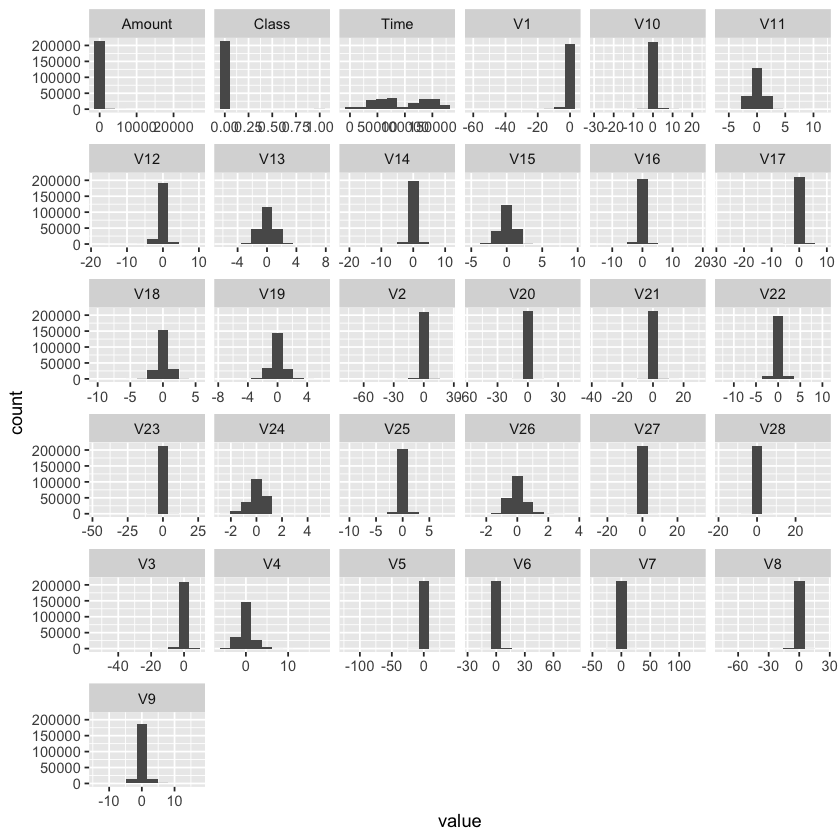

In [4]:

ggplot(gather(credit_train), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')


Look at the histogram above, the most of V's are centered around 0 with some or no outliers. It can be seen as there were very few fraudulent cases over valid cases in the class histogram.

In [24]:
# determine the number of fraud cases
fraud <- filter(credit_train, Class == 1)
valid <- filter(credit_train, Class == 0)
nrow(fraud)
nrow(valid)

[1] 357

[1] 213249

### Fitting Logistic Regression

Logistic Regression Model is used to predict the credit card fraud/not fraud.

In [26]:
Logistic_model = glm(Class~.,credit_train, family = binomial())
summary(Logistic_model)


Call:
glm(formula = Class ~ ., family = binomial(), data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.9358  -0.0283  -0.0181  -0.0110   4.5959  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.683e+00  3.143e-01 -27.625  < 2e-16 ***
Time        -2.160e-06  2.702e-06  -0.799 0.424195    
V1           1.010e-01  5.190e-02   1.947 0.051568 .  
V2           1.514e-02  7.749e-02   0.195 0.845068    
V3          -1.858e-02  6.391e-02  -0.291 0.771290    
V4           7.779e-01  1.019e-01   7.637 2.23e-14 ***
V5           1.219e-01  8.454e-02   1.442 0.149185    
V6          -1.038e-01  8.688e-02  -1.195 0.232092    
V7          -7.726e-02  8.895e-02  -0.869 0.385044    
V8          -1.413e-01  4.155e-02  -3.402 0.000670 ***
V9          -1.648e-01  1.471e-01  -1.121 0.262314    
V10         -8.251e-01  1.254e-01  -6.580 4.71e-11 ***
V11          3.709e-03  9.907e-02   0.037 0.970138    
V12          1.597e-01  1.1

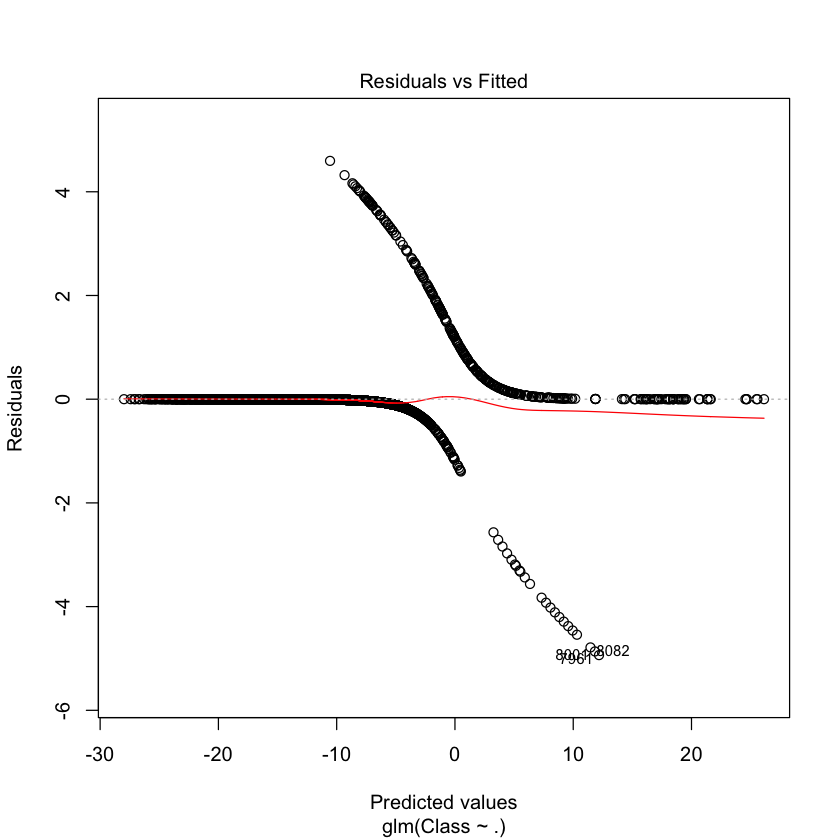

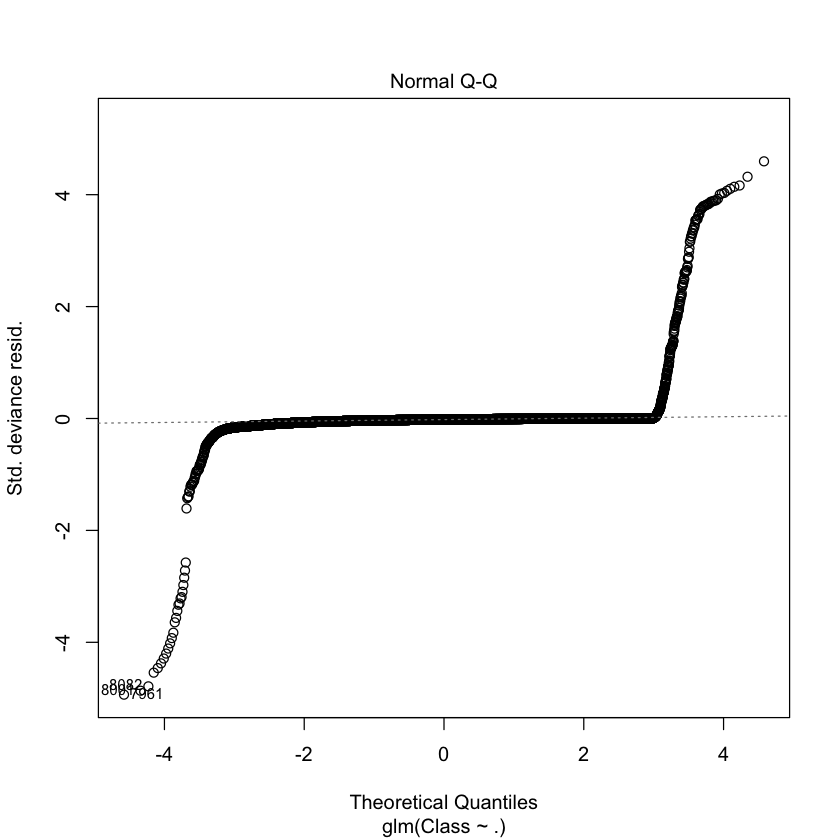

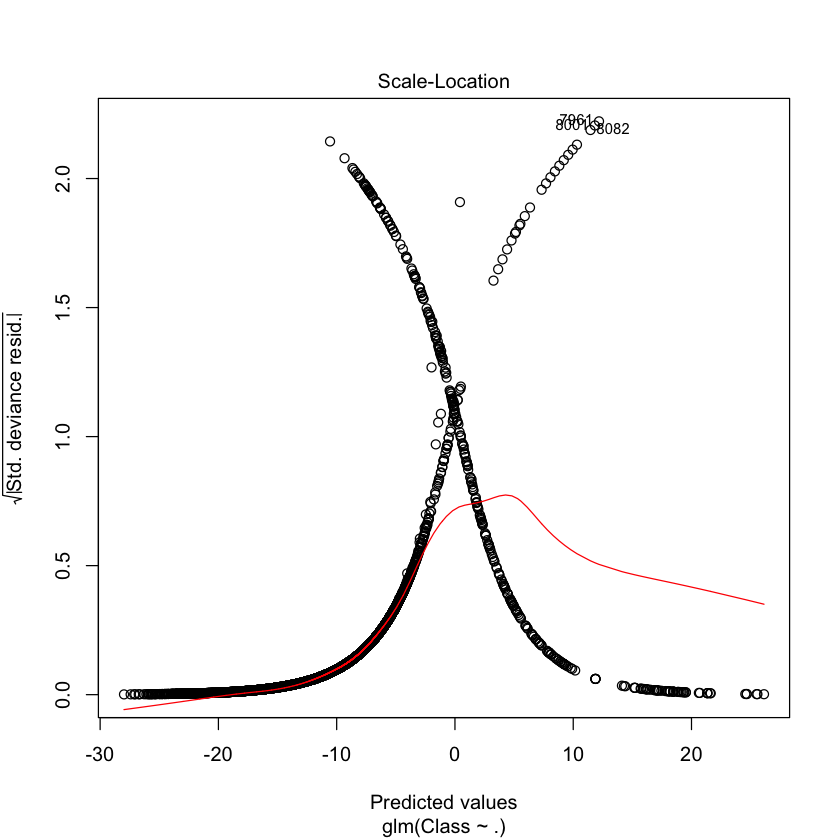

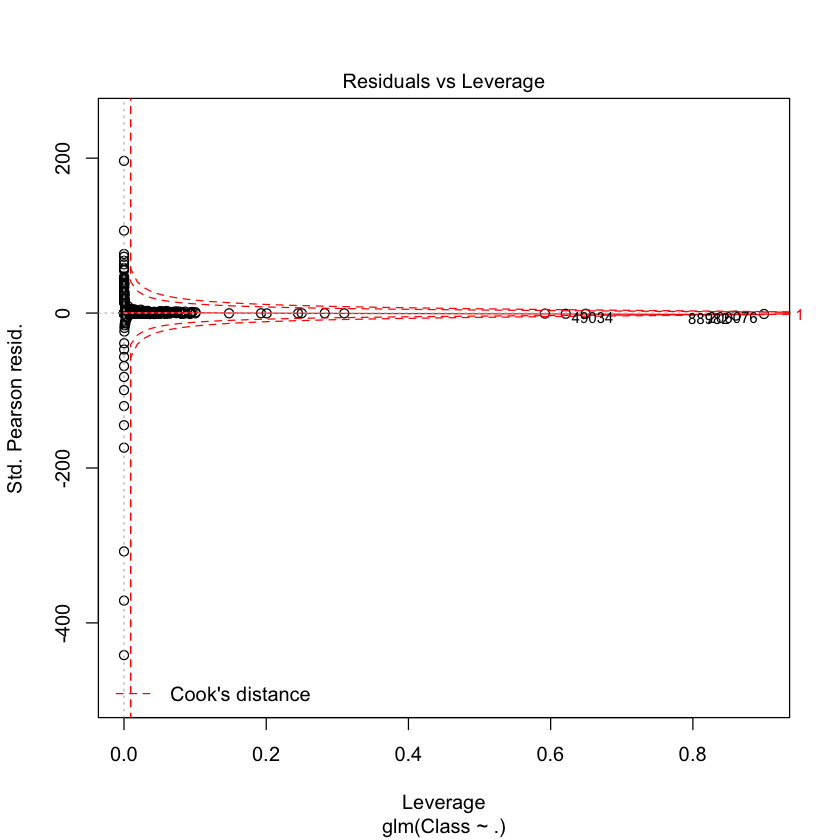

In [27]:
plot(Logistic_model)



### Performance of Logistic Regression

To asses the preformance of Logistic Regression, ROC curve is made. ROC is known as receiver operating characteristics.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



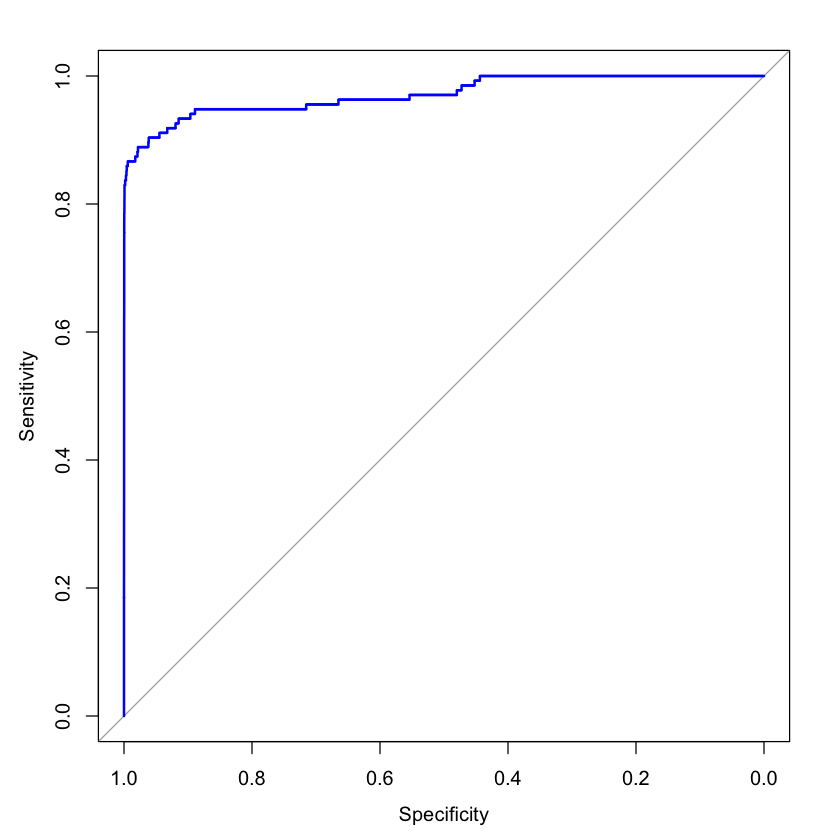

In [30]:
logistic_predict <- predict(Logistic_model,credit_test, probability = TRUE)
auc.gbm = roc(credit_test$Class, logistic_predict, plot = TRUE, col = "blue")

An ideal ROC curve will hug the top left corner, so the larger the AUC the better the classifier. The above ROC curve represents that the performance of logistic regression is great. Since the area under the blue curve is really large which is considered very good.